In [113]:
def find_vertical_bisector(x1, y1, x2, y2):
    if (x1 != x2) and (y1 != y2):
        slope = (y2 - y1)/(x2 - x1)
        m = -1/slope
        xc = (x1+x2)/2
        yc = (y1+y2)/2
        return (m, yc-m*xc) #注意是tuple
    
    elif (x1 == x2) and (y1 != y2):
        return (0, (y1+y2)/2) #注意是tuple
    
    else:
        return (x1+x2) / 2 #注意是float
    

In [114]:
def solve_eqs(eq1, eq2):
    if (type(eq1) == tuple) and (type(eq2) == tuple):
        m1 = eq1[0]
        k1 = eq1[1]
        m2 = eq2[0]
        k2 = eq2[1]
        x = (k2-k1)/(m1-m2)
        y = m1*x+k1
        return (x, y)
    elif (type(eq1) == tuple) and (type(eq2) != tuple):
        m1 = eq1[0]
        k1 = eq1[1]
        xc = eq2
        return (xc, m1*xc+k1)
    
    elif (type(eq1) != tuple) and (type(eq2) == tuple):
        xc = eq1
        m2 = eq2[0]
        k2 = eq2[1]
        return (xc, m2*xc + k2)
    
    else:
        return None

In [115]:
import csv
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt

In [116]:
with open('AR 0818.csv', "r") as arfile:
    raw = list(csv.reader(arfile))
    exp = [] #Df = 0.002, Dk = 1.00 version
    data = []
    label = []
    for i in range(1, len(raw)):
        exp.append(float(raw[i][1]))
    for j in range(125):
        ls = []
        
        for k in range(1, len(raw)):
            ls.append(float(raw[k][2*j+3]))
        data.append(ls)

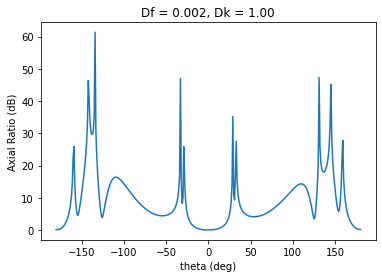

In [117]:
deg = [i-180 for i in range(361)]
plt.plot(deg, exp)
plt.xlabel('theta (deg)')
plt.ylabel('Axial Ratio (dB)')
plt.title('Df = 0.002, Dk = 1.00')
plt.show()

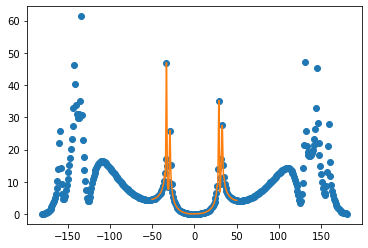

In [118]:
sx1=np.linspace(-50,50,1000)
func1=interpolate.UnivariateSpline(deg, exp,s=0)#强制通过所有点
sy1=func1(sx1)
plt.plot(deg, exp,'o')
plt.plot(sx1,sy1)
plt.show()

In [119]:
#試找出-5deg做出的曲率中心
#target = (154, exp[145])
for i in range(len(sx1)):
    if (sx1[i] < -5) and (sx1[i+1] > -5):
        break
x_1 = sx1[i]
x_2 = sx1[i+1]
y_1 = sy1[i] 
y_2 = sy1[i+1]
line1 = find_vertical_bisector(-5, exp[145], x_1, y_1)
line2 = find_vertical_bisector(-5, exp[145], x_2, y_2)
print(solve_eqs(line1, line2))

(-4.8700208536145, 6.343393158802268)


In [19]:
sx1[290:310]

array([-20.97097097, -20.87087087, -20.77077077, -20.67067067,
       -20.57057057, -20.47047047, -20.37037037, -20.27027027,
       -20.17017017, -20.07007007, -19.96996997, -19.86986987,
       -19.76976977, -19.66966967, -19.56956957, -19.46946947,
       -19.36936937, -19.26926927, -19.16916917, -19.06906907])

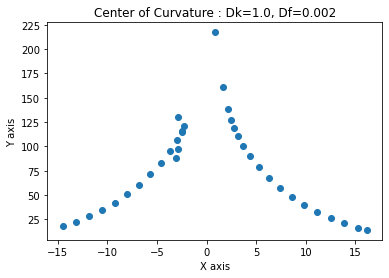

In [287]:
#從-20度到+20度之間抓出的曲率中心變化
x_sol = []
y_sol = []
for ind in range(40):
    for i in range(len(sx1)):
        if (sx1[i] < -20 + ind) and (sx1[i+1] > -20 + ind):
            break
    x_1 = sx1[i+ind]
    x_2 = sx1[i+1+ind]
    y_1 = sy1[i+ind] 
    y_2 = sy1[i+1+ind]
    line1 = find_vertical_bisector(-20+ind, exp[160+ind], x_1, y_1)
    line2 = find_vertical_bisector(-20+ind, exp[160+ind], x_2, y_2)
    (x_val, y_val) = solve_eqs(line1, line2)
    #print((x_val, y_val))
    if x_sol != []:
        if (not abs(x_sol[-1] - x_val) > 20) and (not abs(y_sol[-1] - y_val) > 200):
            x_sol.append(x_val)
            y_sol.append(y_val)
    else:
        x_sol.append(x_val)
        y_sol.append(y_val)
        
plt.scatter(x_sol, y_sol)
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.title('Center of Curvature : Dk=1.0, Df=0.002')
plt.show()

In [342]:
def draw_center_curvature_2(lsx, lsy, title):
    sx1 = [-50 + 0.01*i for i in range(10000)]
    func1=interpolate.UnivariateSpline(lsx, lsy,s=0)#强制通过所有点
    sy1=func1(sx1)
    x_sol = []
    y_sol = []
    for ind in range(1000):
        i = 3000 + ind*1
        x_1 = sx1[i-1]
        x_2 = sx1[i+1]
        y_1 = sy1[i-1] 
        y_2 = sy1[i+1]
        line1 = find_vertical_bisector(-20+ind*0.01, sy1[i], x_1, y_1)
        line2 = find_vertical_bisector(-20+ind*0.01, sy1[i], x_2, y_2)
        (x_val, y_val) = solve_eqs(line1, line2)
        #print((x_val, y_val))
        if x_sol != []:
            #if (not abs(x_sol[-1] - x_val) > 2) and (not abs(y_sol[-1] - y_val) > 10):
            x_sol.append(x_val)
            y_sol.append(y_val)
        else:
            x_sol.append(x_val)
            y_sol.append(y_val)
    plt.scatter(x_sol, y_sol)
    plt.xlabel('X axis')
    plt.ylabel('Y axis')
    plt.title('Center of Curvature : '+title)
    plt.ylim(-5,150)
    plt.xlim(-15,-2)
    plt.grid(True)
    plt.show()

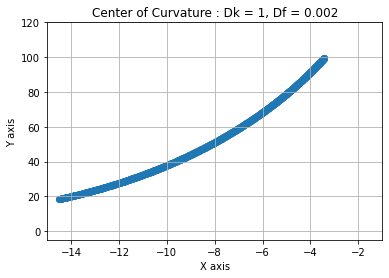

In [317]:
draw_center_curvature_2(deg, exp, 'Dk = 1, Df = 0.002')

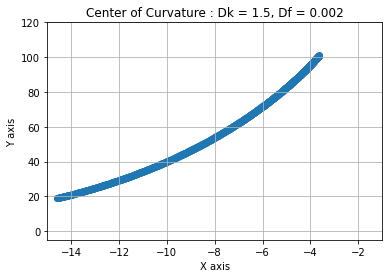

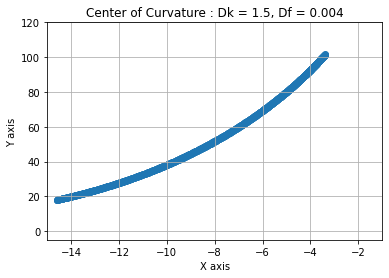

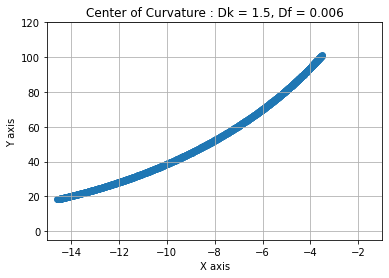

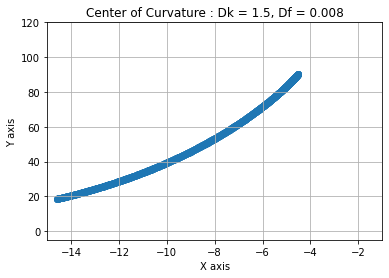

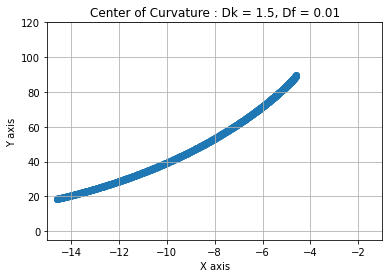

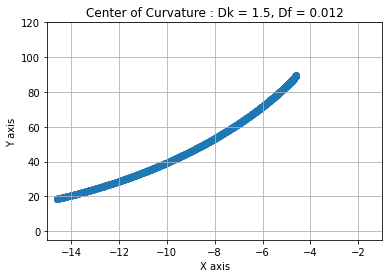

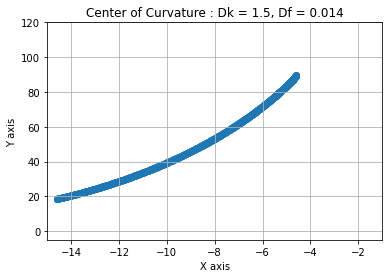

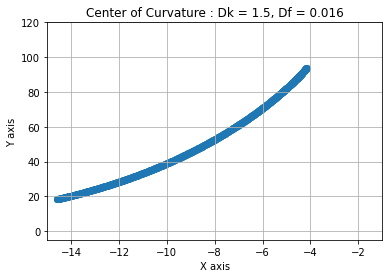

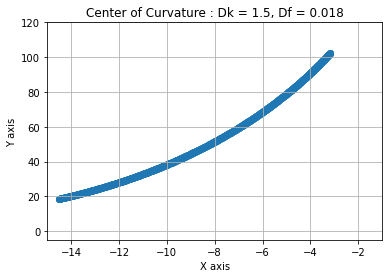

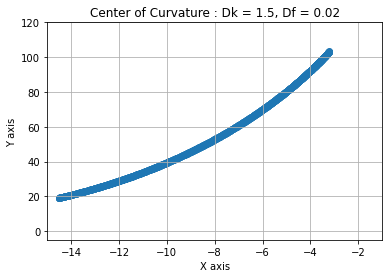

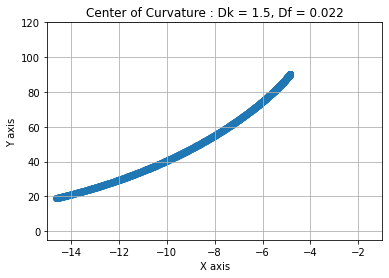

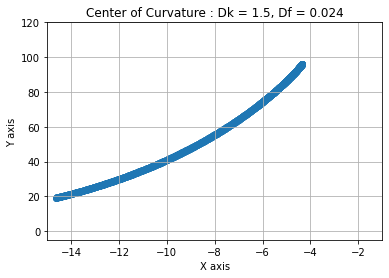

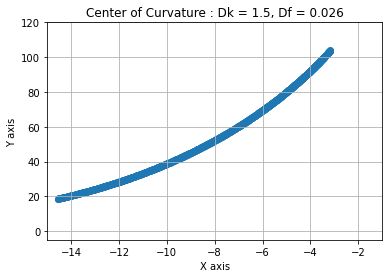

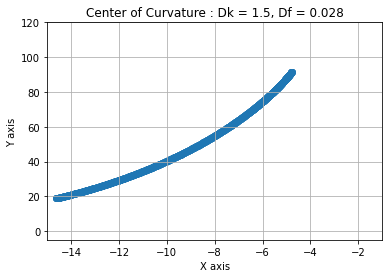

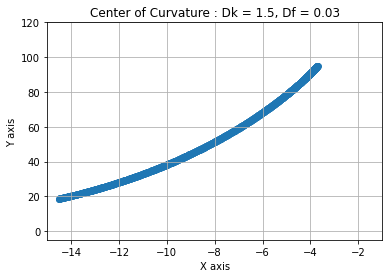

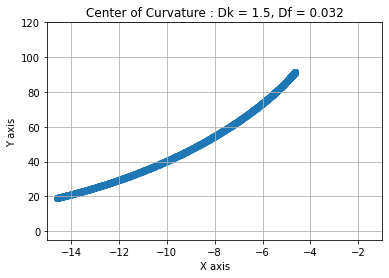

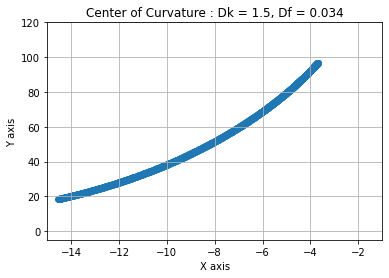

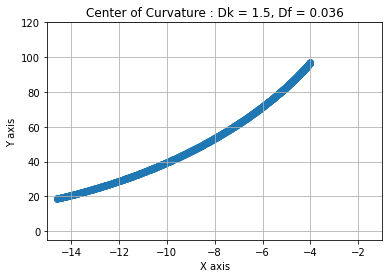

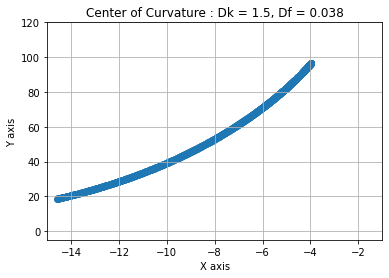

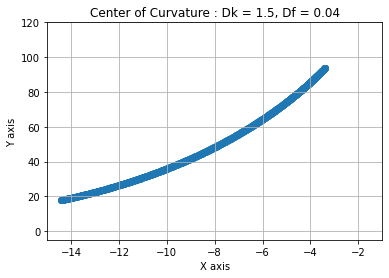

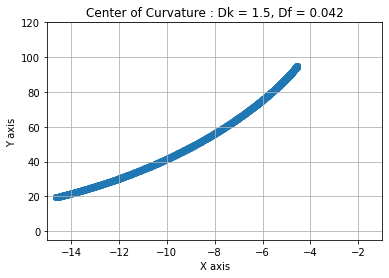

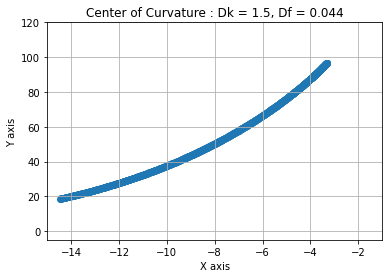

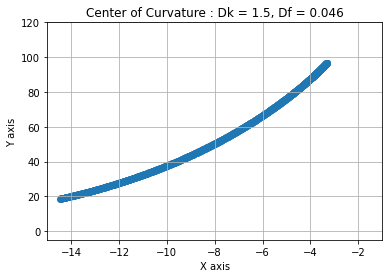

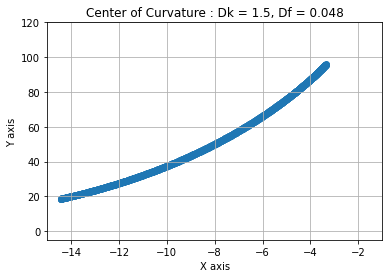

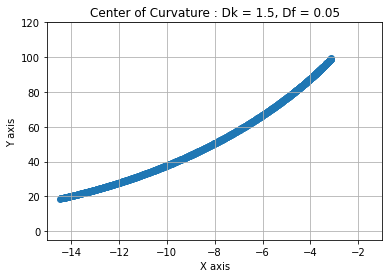

In [318]:
for i in range(25):
    draw_center_curvature_2(deg, data[5*i], 'Dk = 1.5, Df = '+str(round((0.002*i+0.002), 3)))

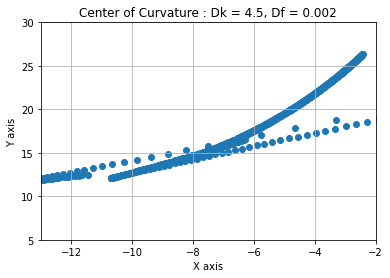

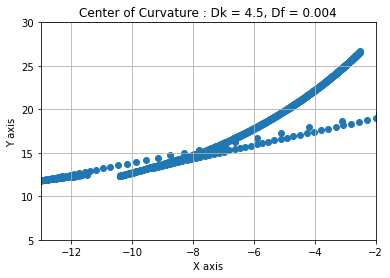

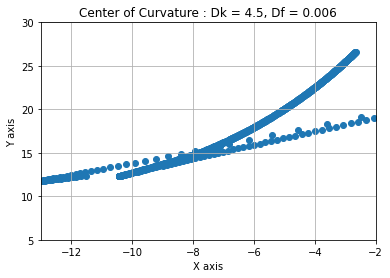

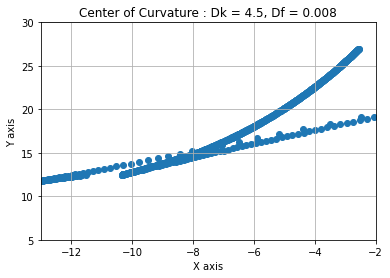

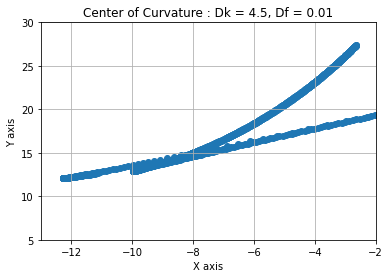

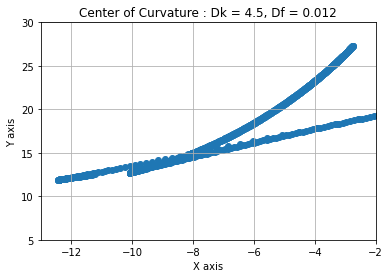

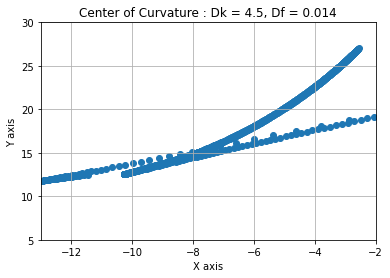

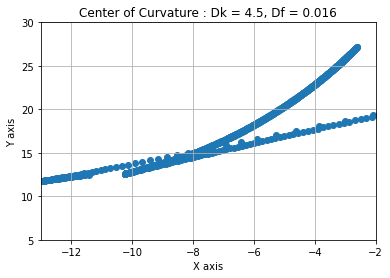

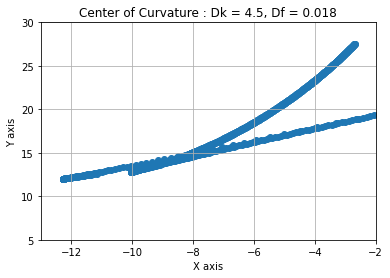

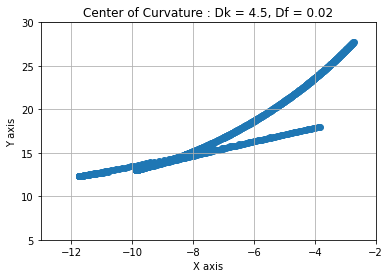

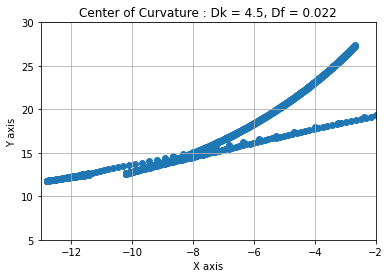

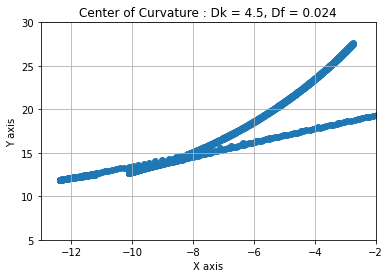

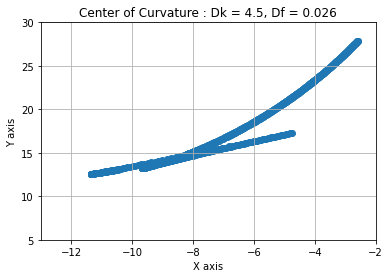

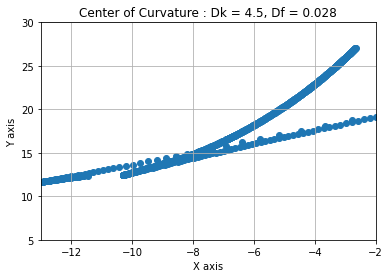

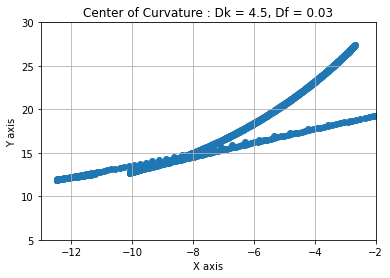

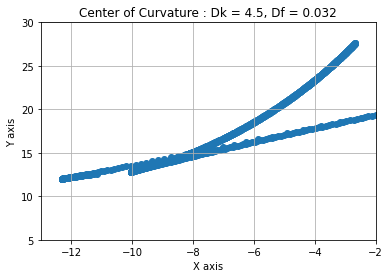

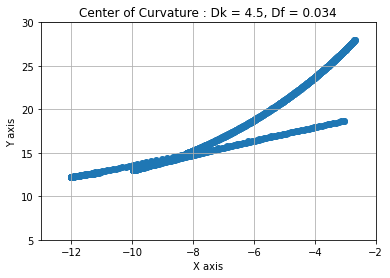

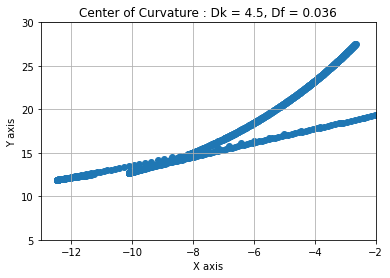

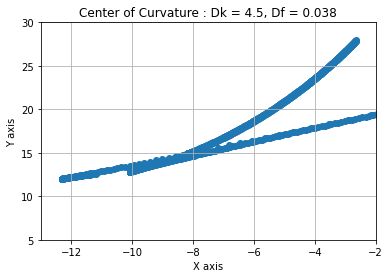

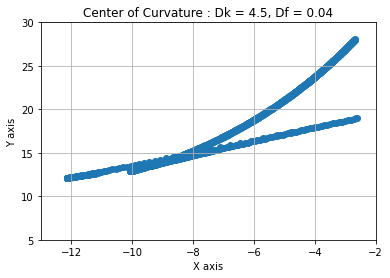

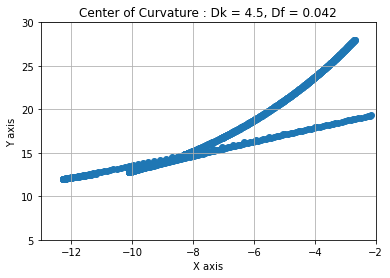

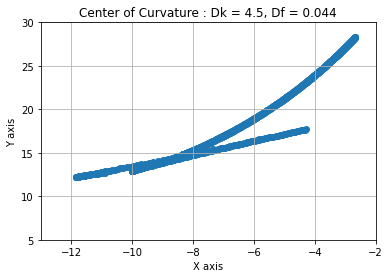

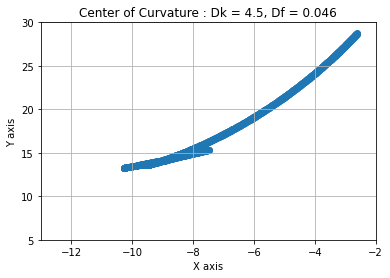

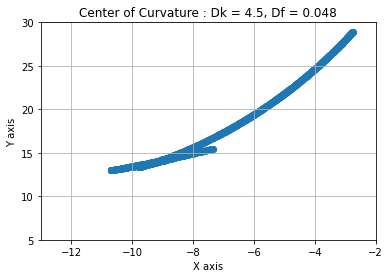

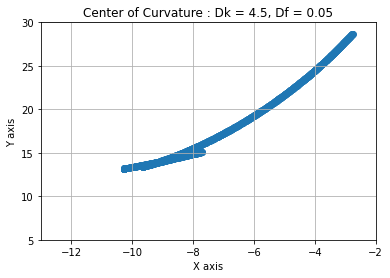

In [324]:
for i in range(25):
    draw_center_curvature_2(deg, data[3+5*i], 'Dk = 4.5, Df = '+str(round((0.002*i+0.002), 3)))

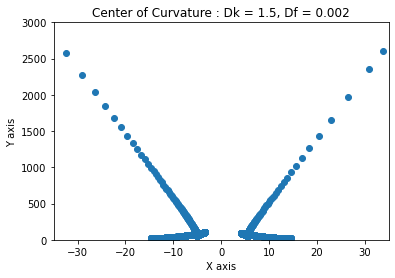

In [283]:
# 調整原始讓發散情形也被觀察
draw_center_curvature_2(deg, data[0], 'Dk = 1.5, Df = 0.002')

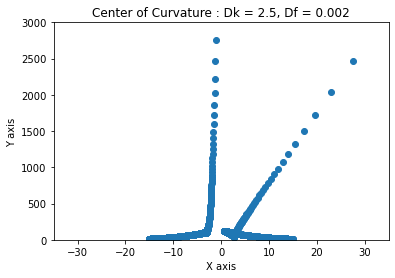

In [284]:
draw_center_curvature_2(deg, data[1], 'Dk = 2.5, Df = 0.002')

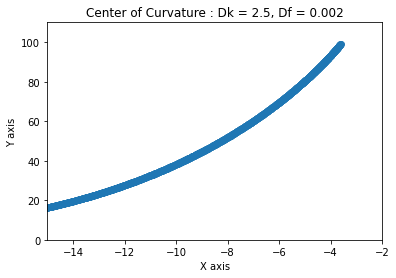

In [229]:
draw_center_curvature_2(deg, data[1], 'Dk = 2.5, Df = 0.002')

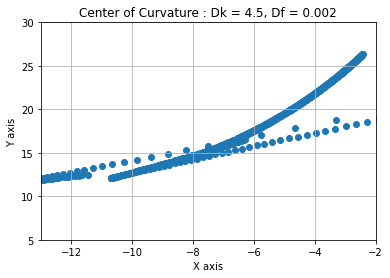

In [326]:
draw_center_curvature_2(deg, data[3], 'Dk = 4.5, Df = 0.002')

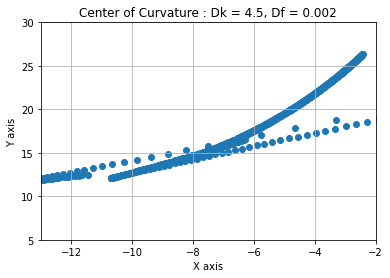

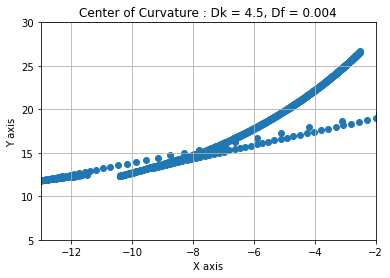

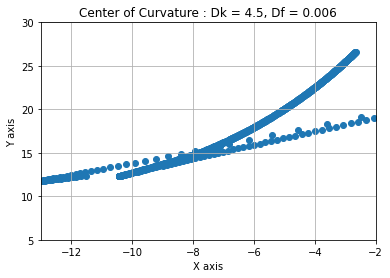

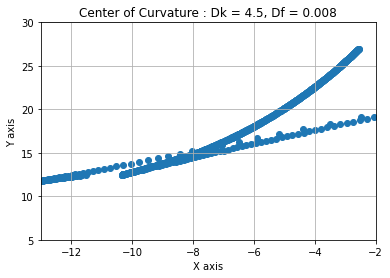

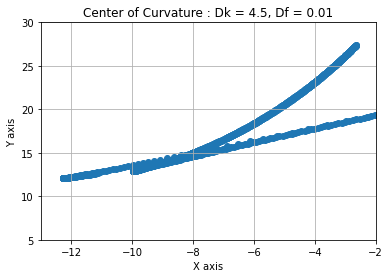

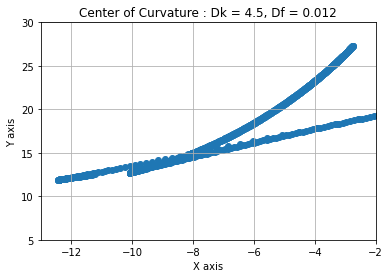

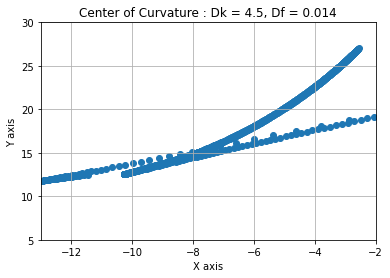

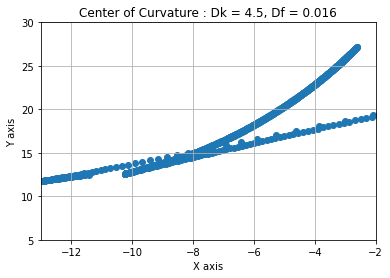

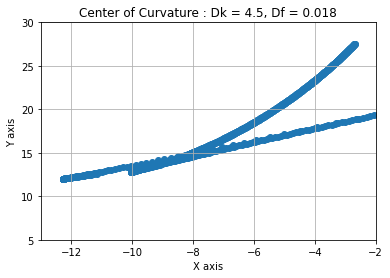

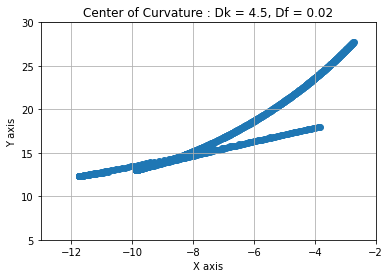

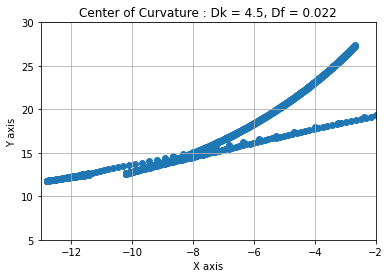

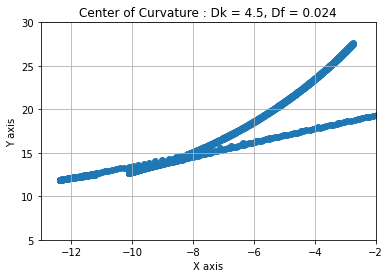

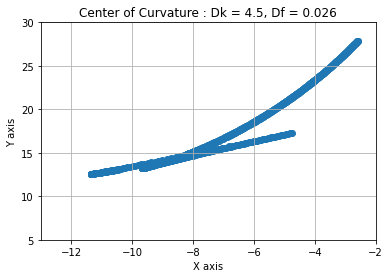

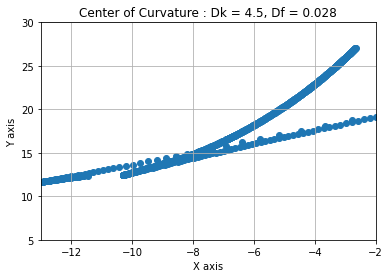

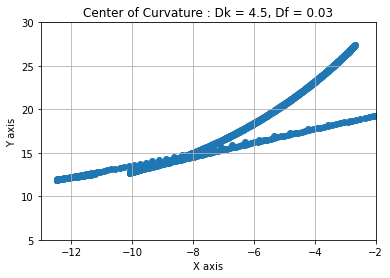

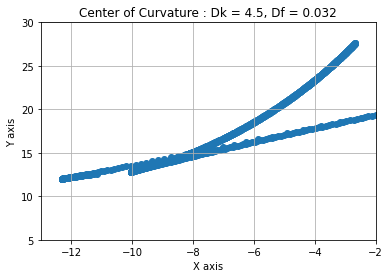

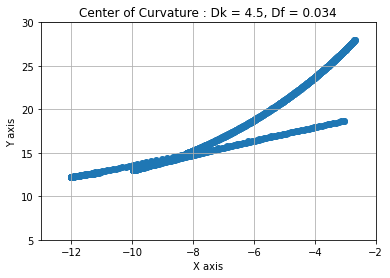

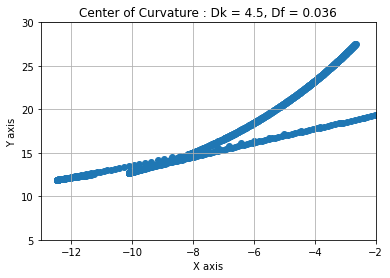

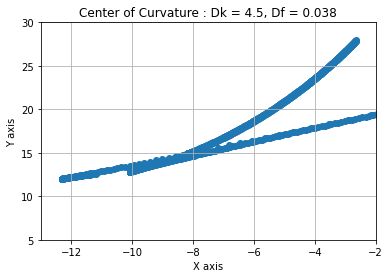

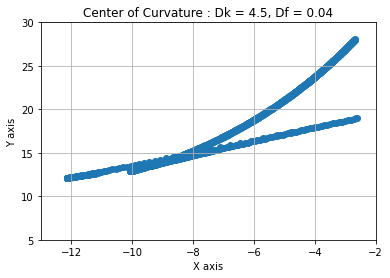

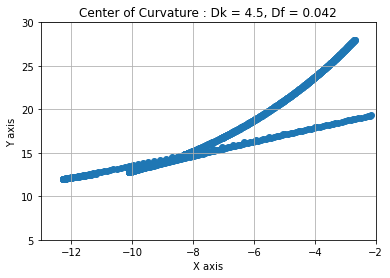

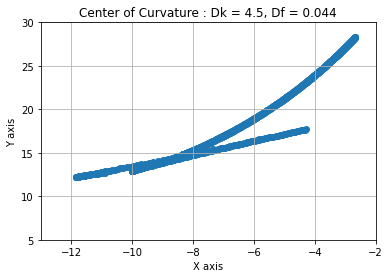

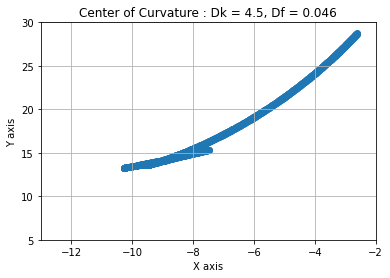

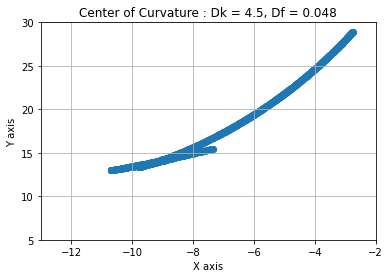

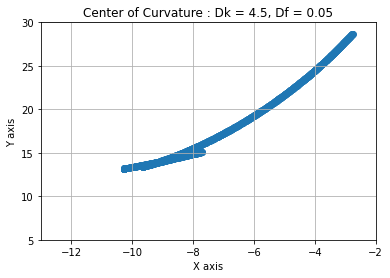

In [327]:
for i in range(25):
    draw_center_curvature_2(deg, data[3+5*i], 'Dk = 4.5, Df = '+str(round((0.002*i+0.002), 3)))

In [335]:
# Df = 0.00, 觀察Dk的變化
with open('../Datasets/500資料版/軸比 Plot.csv', "r") as file:
    new_raw = list(csv.reader(file))
    new_data = []
    Dk = []
    for j in range(501):
        ls = []
        Dk.append(round((1+0.01*j), 2))
        for k in range(1, len(new_raw)):
            ls.append(float(new_raw[k][2*j+1]))
        new_data.append(ls)

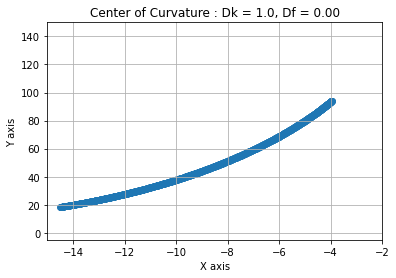

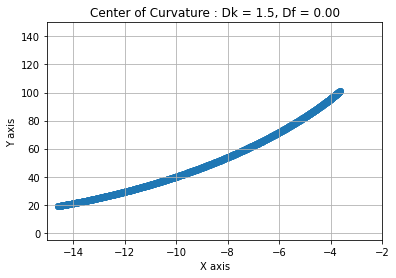

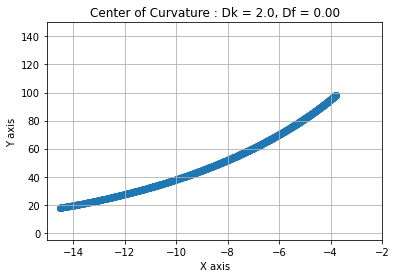

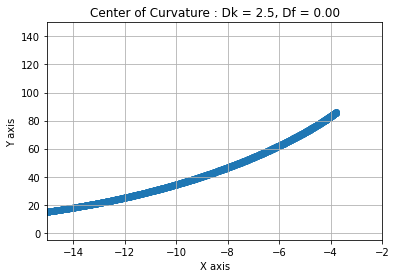

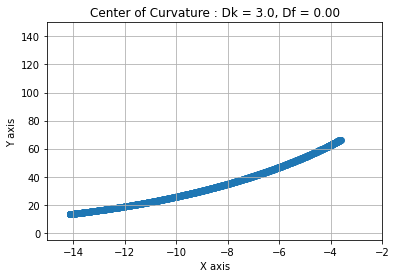

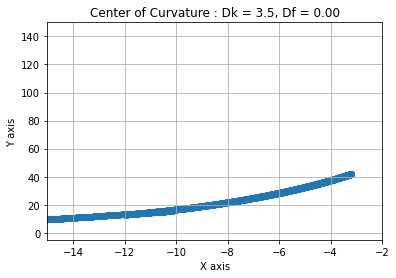

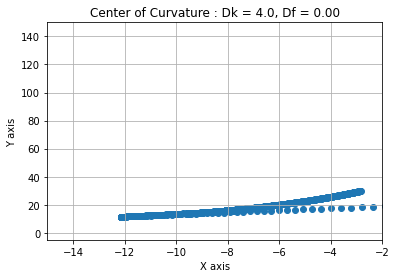

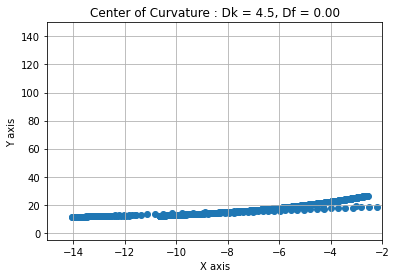

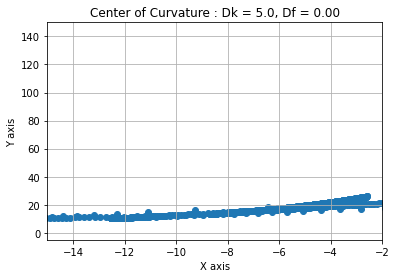

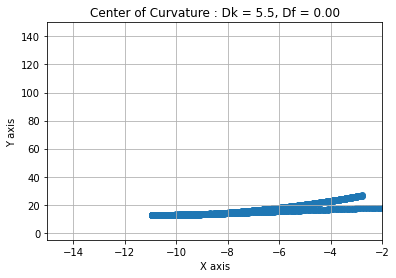

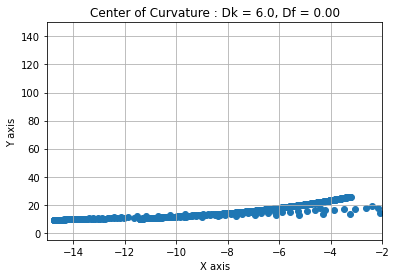

In [346]:
for i in range(11):
    draw_center_curvature_2(deg, new_data[i*50], 'Dk = '+str(round((0.5*i+1), 3))+', Df = 0.00')

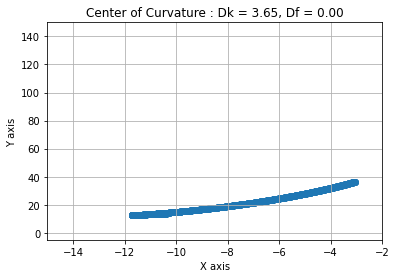

In [351]:
draw_center_curvature_2(deg, new_data[265], 'Dk = '+str(3.65)+', Df = 0.00')

In [372]:
# 在Dk 2.00 ~ 3.65找出trace到的x = -4之y座標
def trace_y_value(lsx, lsy):
    sx1 = [-50 + 0.01*i for i in range(10000)]
    func1=interpolate.UnivariateSpline(lsx, lsy,s = 0)
    sy1=func1(sx1)
    x_sol = []
    y_sol = []
    for ind in range(1000):
        i = 3000 + ind*1
        x_1 = sx1[i-1]
        x_2 = sx1[i+1]
        y_1 = sy1[i-1] 
        y_2 = sy1[i+1]
        line1 = find_vertical_bisector(-20+ind*0.01, sy1[i], x_1, y_1)
        line2 = find_vertical_bisector(-20+ind*0.01, sy1[i], x_2, y_2)
        (x_val, y_val) = solve_eqs(line1, line2)
        #print((x_val, y_val))
        if x_sol != []:
            if ( (x_sol[-1] - x_val) < 0):
                x_sol.append(x_val)
                y_sol.append(y_val)
        else:
            x_sol.append(x_val)
            y_sol.append(y_val)
            
    func2 = interpolate.UnivariateSpline(x_sol, y_sol,s=1)
    ans = func2([-4])
    return ans[0]

A Discontinuity occurs at Dk = 3.11
A Discontinuity occurs at Dk = 3.15


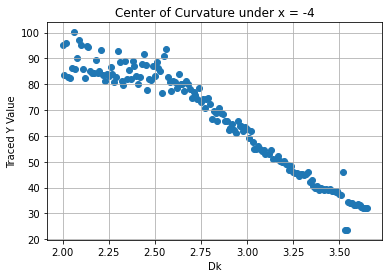

In [373]:
# 在Dk 2.00 ~ 3.65找出trace到的x = -4之y座標
out_y = []
out_x = []

for i in range(100, 266):
    
    try:
        out_y.append(trace_y_value(deg, new_data[i]))
        out_x.append(Dk[i])
    except:
        print('A Discontinuity occurs at Dk =', Dk[i])
    
plt.scatter(out_x, out_y)
plt.xlabel('Dk')
plt.ylabel('Traced Y Value')
plt.title('Center of Curvature under x = -4')
plt.grid(True)
plt.show()

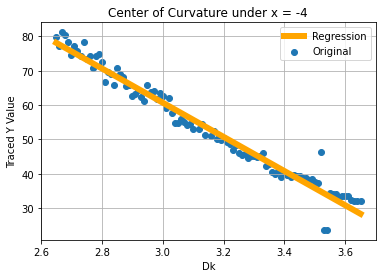

Correlation Coefficient of Dk and Traced Y Value at X = -4 : -0.9832652697417568
Prediction Equation : y = -49.810183353361616 x + 210.12711015836686


In [387]:
import scipy.stats as stats
# 試著運算Dk 在2.65~3.65之間的回歸
x_data = [2.65+i*0.01 for i in range(101)]
args1 = np.polyfit(out_x[65:], out_y[65:], 1)
plt.scatter(out_x[65:], out_y[65:], label = 'Original')
plt.plot(x_data, [element*args1[0] + args1[1] for element in x_data], label = 'Regression', color = 'orange', linewidth = 6)
plt.legend()
plt.xlabel('Dk')
plt.ylabel('Traced Y Value')
plt.title('Center of Curvature under x = -4')
plt.grid(True)
plt.show()
print('Correlation Coefficient of Dk and Traced Y Value at X = -4 :',stats.pearsonr(out_x[65:], out_y[65:])[0])
print("Prediction Equation : y =", args1[0],"x +", args1[1])